# Lab 8 : Star Formation 

In [37]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [40]:
def StarFormationRate(L, Type, TIR=0):
    """Function that computes star fromations rate fo galaxy following 
    Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2
    Parameters
        L: float 
            represeting luminosity of galaxy in erg/s
        Type: string
            indiactes wave lengh: 'FUV', 'NUV', "TIR', 'Halpha'
        TIR: float
            total infared luminocity in erg/s default =0
    
    Output
    SFR: 'float
        log of star formation rate Msun/yr
    
    """

    if (Type=='FUV'):
        logCx=43.45 #calabrate from LFUV to SFR
        TIRc=0.46# correct for dust apsorption
    elif (Type=='NUV'):
        logCx=43.17 #calabrate from LNUV to SFR
        TIRc=0.27# correct for dust apsorption
    elif (Type=='Halpha'):
        logCx=41.27 #calabrate from LHalpha to SFR
        TIRc=0.0024# correct for dust apsorption
    elif (Type=='TIR'):
        logCx=43.41 #calabrate from LTIR to SFR
        TIRc=0# no correct needed for dust apsorption
    else:
        print("WARNING: input for Type is invalid\ Please input 'FUV', 'NUV', 'TIR' or 'Halpha'")
        
    #correct lum of for dust in TIR
    Lcorr= L+ TIRc*TIR
    #star form rate
    SFR= np.log10(Lcorr)-logCx
    return SFR
        

Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [43]:
# First need the Luminosity of the Sun in the right units
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [45]:
#  WLM Dwarf Irregular Galaxy
LsunErgs=const.L_sun.to(u.erg/u.s).value
NUV_WLM=1.71e7*LsunErgs
TIR_WLM=2.48e6*LsunErgs+3.21e5*LsunErgs+2.49e6*LsunErgs
#TIR+NIR+MIR+FIR

In [51]:
#test
StarFormationRate(NUV_WLM, 'NUV',TIR_WLM)

-2.319186168309912

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [53]:
def SFRMainSequence(Mstar, z):
    """
    funciton that computes avarge SFR of a galxy as a function of stellar mass and red shift
    Parameters
    Input
    Mstar: float
        stellar mass of galxy in Msun
    z: float
        redshift
    Output
    SFR: float
        log of SFR Msun/yr
    """
    a=0.7-0.13*z
    b=0.38+1.14*z-0.19*z**2

    SFR=a*(np.log10(Mstar)-10.5)+b
    return SFR

# Step 2

In [55]:
# MW at z=0
#stellar mass disk at z=0
MWmstar=7.5e10

In [61]:
#SFR for a Mw type galaxy at z=0 in log
print(SFRMainSequence(MWmstar,0))
#not log
print(10**SFRMainSequence(MWmstar,0))

0.64254288437419
4.390792203431891


In [63]:
# MW at z = 1
#SFR for a Mw type galaxy at z=1 in log
print(SFRMainSequence(MWmstar,1))
#not log
print(10**SFRMainSequence(MWmstar,1))

1.5437849201332692
34.97719031976979


# Step 3

In [67]:
# create an array of stellar masses
Mass=np.linspace(1e8,1e12)

<Figure size 640x480 with 0 Axes>

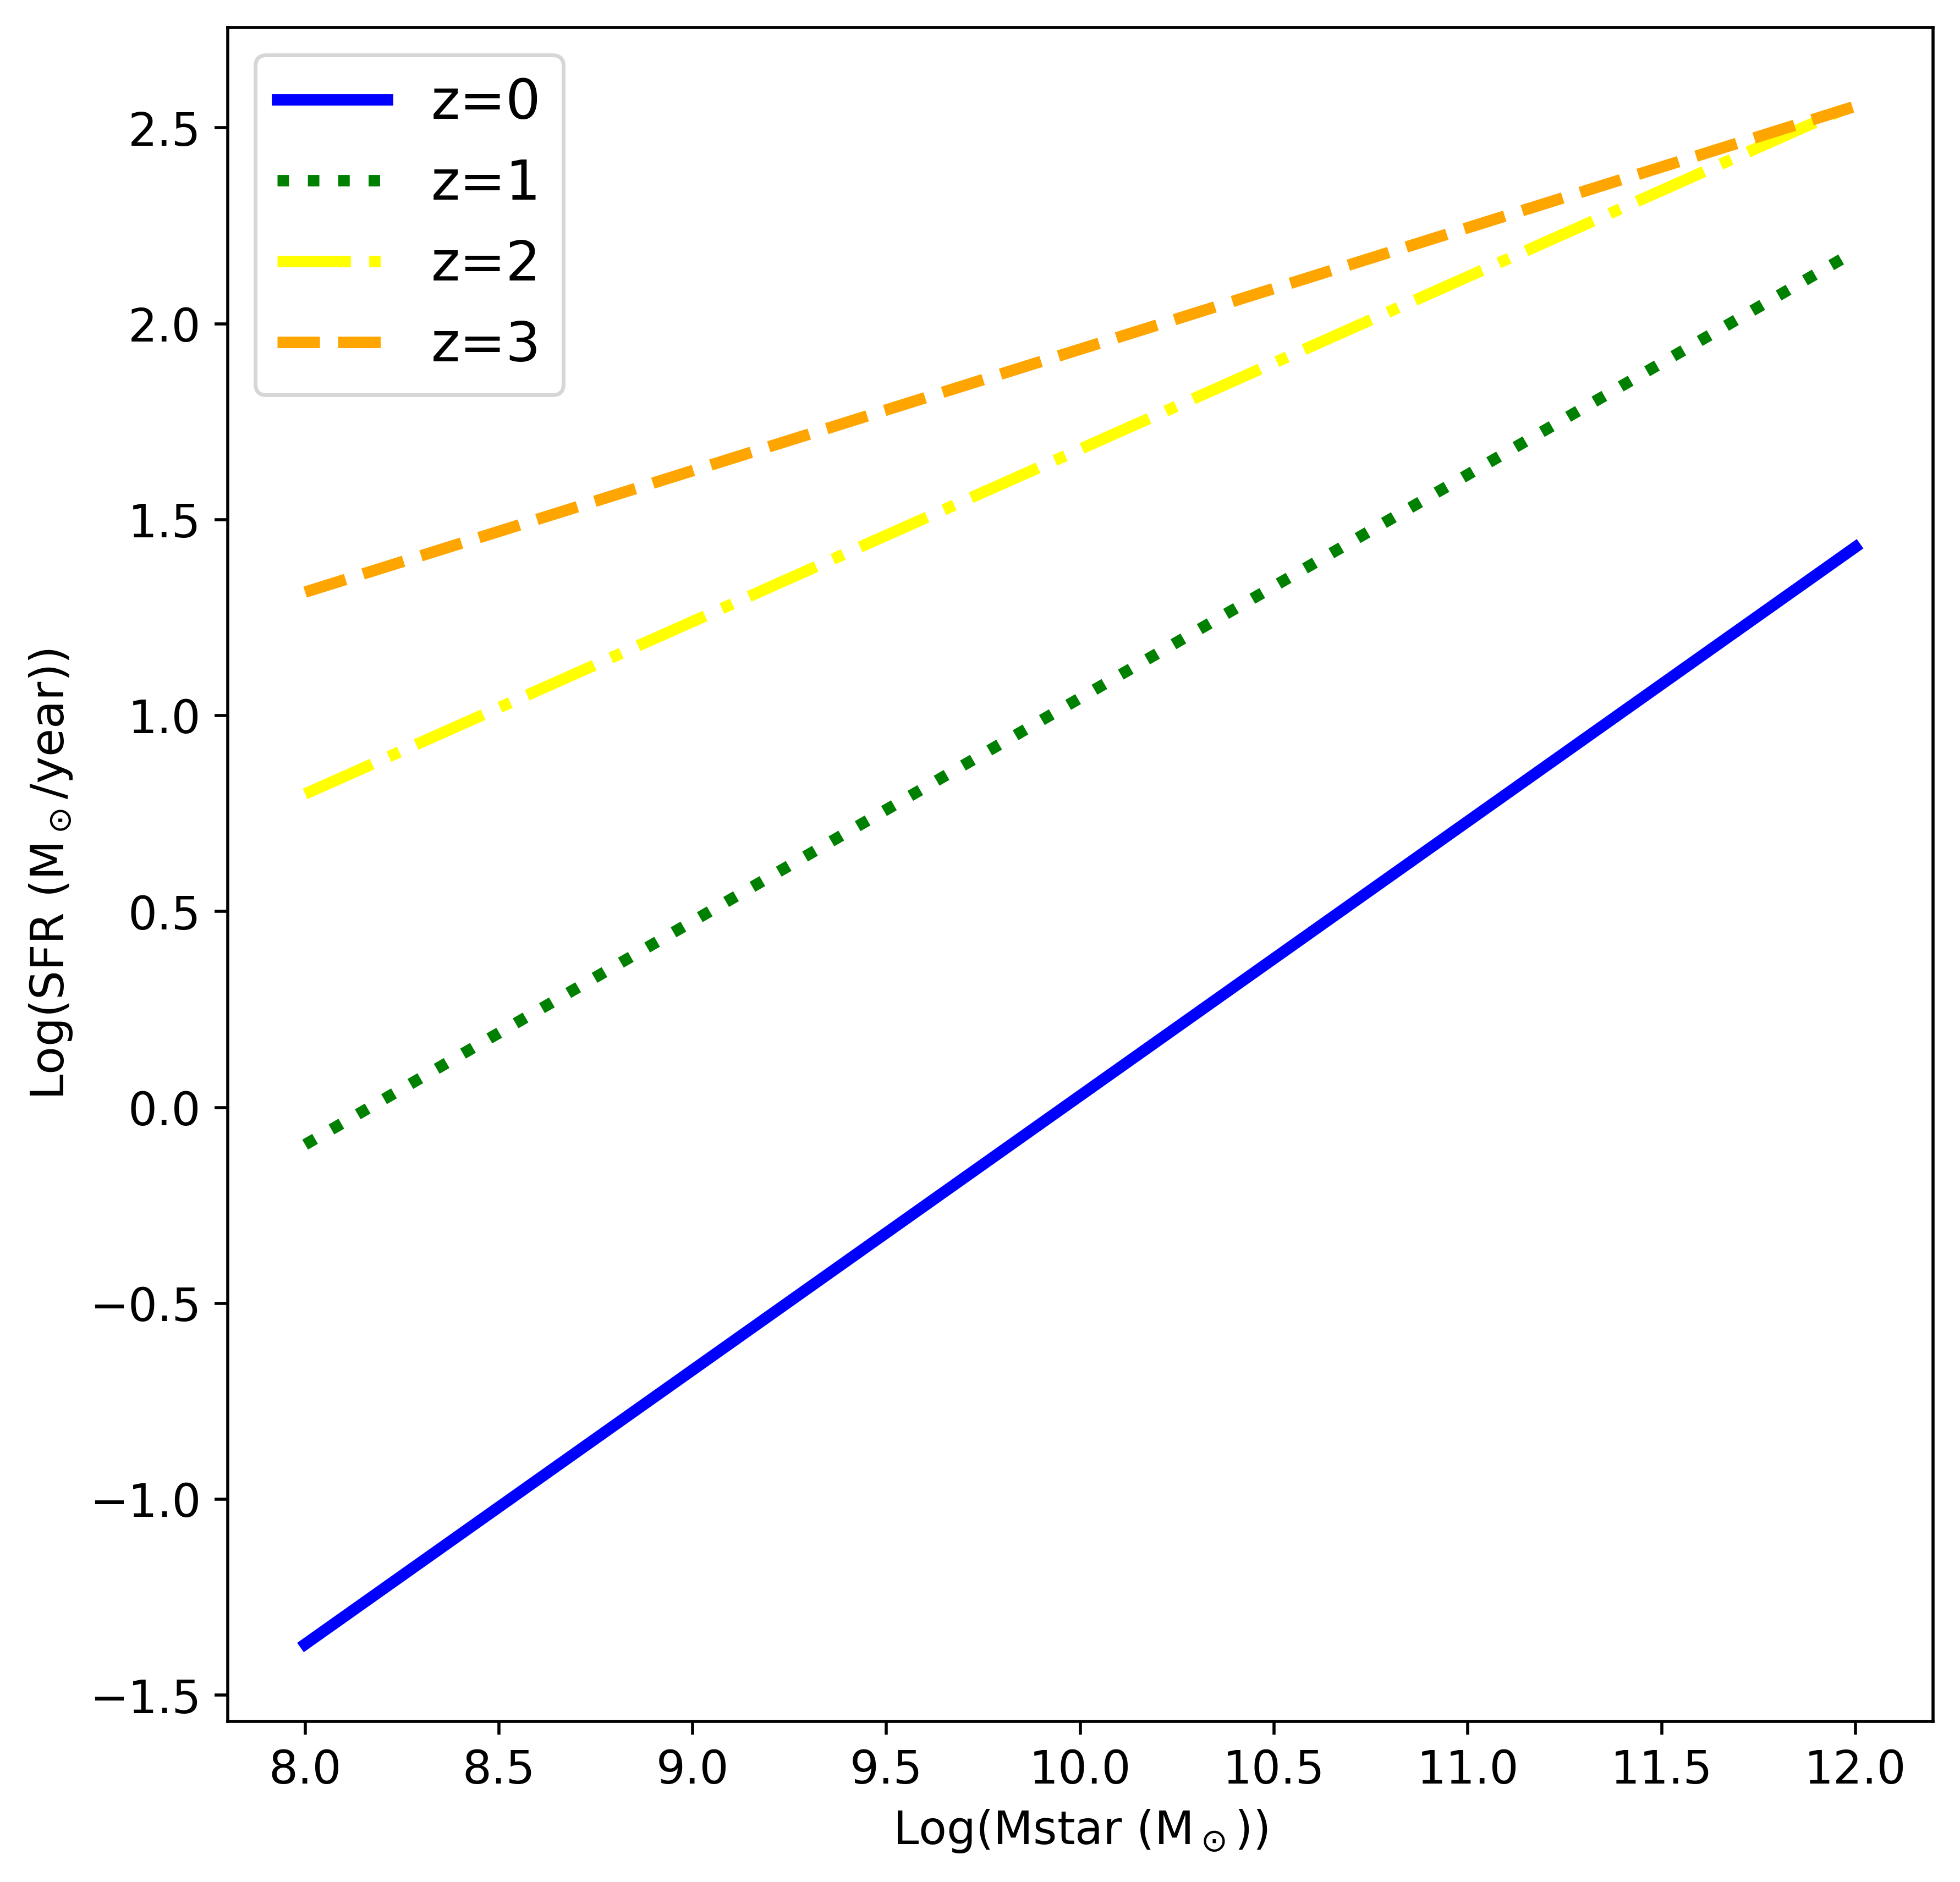

In [79]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(Mass),SFRMainSequence(Mass,0)
        ,color='blue', linewidth=3, label='z=0')
plt.plot(np.log10(Mass),SFRMainSequence(Mass,1)
        ,color='green', linewidth=3, label='z=1', linestyle="dotted")
plt.plot(np.log10(Mass),SFRMainSequence(Mass,2)
        ,color='yellow', linewidth=3, label='z=2', linestyle="dashdot")
plt.plot(np.log10(Mass),SFRMainSequence(Mass,3)
        ,color='orange', linewidth=3, label='z=3', linestyle="dashed")
# Add axis labels
plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')

plt.show()
# Save file
plt.savefig('Lab8_SFR_MainSequence.png')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [83]:
# normal galaxies 
TIR_Normal=1e10*LsunErgs
print(10**StarFormationRate(TIR_Normal, "TIR"))

1.4892648150381245


In [89]:
# HLIRGs
TIR_HLIRG=1e13*LsunErgs
print(10**StarFormationRate(TIR_HLIRG, "TIR"))

1489.2648150381244
